In [1]:
import logging
import pandas as pd
import matplotlib.pyplot as plt
import math

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:20,.2f}'.format
# Set up a basic logger
logger = logging.getLogger("MLLogger")
logger.setLevel(logging.DEBUG)  # Set the global logging level

def printMetric(desc, metric):
    print(desc + " is " + str(metric) + ".")

# for columns in data, change value <0, and upper 0.99 quantile as NA
def trim_outliers(data, columns, upper_percent=0.99):
    df_trim = data.copy()
    for col in columns:
        upper_bound = df_trim[col].quantile(upper_percent)
        df_trim[col] = df_trim[col].where((df_trim[col] >= 0) & (df_trim[col] <= upper_bound), np.nan)
    return df_trim



# draw one box plot for multiple columns
def box_plot(data, columns, fig_path):
    data[columns].plot(kind='box', figsize=(8, 5), vert=False, patch_artist=True,
                                boxprops=dict(facecolor='lightblue', color='gray'),
                                medianprops=dict(color='red'),
                                flierprops=dict(marker='o', markerfacecolor='orange', markersize=5, linestyle='none'))

    plt.title("Box Plot")
    plt.xlabel("Value")
    plt.grid(True, axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.savefig(fig_path, dpi=500)
    plt.clf()

# draw single histogram for column
def hist_plot(column, fig_path):
    plt.figure(figsize=(8, 5))
    plt.hist(column.dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title('Histogram')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.savefig(fig_path, dpi=300)
    plt.clf()

# draw multiple histogram for columns
def multi_hist_plot(columns, fig_path, data):
    # set image layout
    num_vars = len(columns)
    cols = 5  # images per column
    rows = math.ceil(num_vars / cols)

    # create canvas
    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))
    axes = axes.flatten()

    # for each col
    for i, col in enumerate(columns):
        axes[i].hist(data[col].dropna(), bins=10, color='skyblue', edgecolor='black')
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
        # axes[i].set_yscale('log') # log scale for better visibility

    # hide empty image
    for j in range(len(columns), len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.savefig(fig_path, dpi=500)
    plt.clf()

def compare_stat(summary_before, summary_after):
    comparison = summary_before.T.join(summary_after.T, lsuffix='_before', rsuffix='_after')
    print(comparison[['mean_before', 'mean_after', 'std_before', 'std_after', 'min_before', 'min_after', 'max_before', 'max_after']])
    return comparison

def half_missing(df):
    threshold = len(df) / 2
    missing_counts = df.isnull().sum()
    return (missing_counts > threshold).sum()

def zero_missing(df):
    missing_counts = df.isnull().sum()
    return (missing_counts == 0).sum()

import matplotlib.pyplot as plt
import math

def plot_boxplots(df, cols_to_plot, save_loc=None):
    n = len(cols_to_plot)
    # Number of columns in the grid layout
    rows = math.ceil(math.sqrt(n))
    cols = rows

    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
    axes = axes.flatten()  # Flatten in case of 2D grid

    for i, col in enumerate(cols_to_plot):
        axes[i].boxplot(df[col].dropna(), vert=True)
        axes[i].set_title(col)
    
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()

    if save_loc:
        plt.savefig(save_loc)
    else:
        plt.show()







In [ ]:
# Import dataset
input_data = r"../input/training_set_VU_DM.csv"
df = pd.read_csv(input_data)

df_nocomp = df.drop(columns=[col for col in df.columns if 'comp' in col])


In [3]:
# x records
printMetric("Amount of records", len(df))

# NA ratio is x
printMetric("Ratio of NA values", f"{df.isna().mean().mean() * 100:.4f}%")
printMetric("Ratio of NA values excluding competitor data", f"{df_nocomp.isna().mean().mean() * 100:.4f}%")

# Duplicate records is x
printMetric("Amount of duplicate records", df.duplicated().sum())


Amount of records is 4958347.
Ratio of NA values is 44.7182%.
Ratio of NA values excluding competitor data is 14.5063%.
Amount of duplicate records is 0.


In [13]:
# NA ratio per column
print(df.isna().sum())

print("over half missing", half_missing(df))
print("zero missing", zero_missing(df))

srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
visitor_hist_starrating        4706481
visitor_hist_adr_usd           4705359
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                 7364
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2           1090348
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
srch_query_affinity_score      4640941
orig_destination_distance

In [14]:
print(df.describe())

                   srch_id              site_id  visitor_location_country_id  \
count         4,958,347.00         4,958,347.00                 4,958,347.00   
mean            166,366.56                 9.95                       175.34   
std              96,112.23                 7.65                        65.92   
min                   1.00                 1.00                         1.00   
25%              82,936.00                 5.00                       100.00   
50%             166,507.00                 5.00                       219.00   
75%             249,724.00                14.00                       219.00   
max             332,785.00                34.00                       231.00   

       visitor_hist_starrating  visitor_hist_adr_usd      prop_country_id  \
count               251,866.00            252,988.00         4,958,347.00   
mean                      3.37                176.02               173.97   
std                       0.69                10

In [22]:
colnames = list(df)
print(colnames)

def split_by_substring(items, substring):
    contains = [item for item in items if substring in item]
    does_not_contain = [item for item in items if substring not in item]
    return contains, does_not_contain

substring = 'comp'

has_comp, no_comp = split_by_substring(colnames, substring)

has_id, no_id = split_by_substring(no_comp, 'id')

for col in has_id:
    print("Unique {}:".format(col), df[col].nunique())

bool_columns = ["prop_brand_bool", "promotion_flag", "srch_saturday_night_bool", "random_bool", "click_bool", "booking_bool"]
datasize = len(df)

for col in bool_columns:
    print("Times {} happened:".format(col), df[col].sum(), ", or {}%".format(round(df[col].sum() / datasize * 100, 1)))

['srch_id', 'date_time', 'site_id', 'visitor_location_country_id', 'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id', 'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool', 'prop_location_score1', 'prop_location_score2', 'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag', 'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count', 'srch_children_count', 'srch_room_count', 'srch_saturday_night_bool', 'srch_query_affinity_score', 'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv', 'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv', 'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv', 'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv', 'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv', 'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv', 'comp7_rate_percent_diff', 'comp8_rate', 'comp8_inv', 'comp8_rate_percent_diff', 'click_b

In [ ]:
print("Contains 'comp':", has_comp)
print("Does not contain 'comp':", no_comp)
print("no comp, no id", no_id)
print(has_id)

numerical_nonid_cols = ['visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_location_score1', 'prop_location_score2', 'prop_starrating', 'prop_review_score', 'prop_log_historical_price', 'position', 'price_usd','srch_length_of_stay', 'srch_booking_window', 'srch_adults_count', 'srch_children_count', 'srch_room_count', 'srch_query_affinity_score', 'orig_destination_distance', 'gross_bookings_usd']


['srch_id', 'date_time', 'site_id', 'visitor_location_country_id', 'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id', 'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool', 'prop_location_score1', 'prop_location_score2', 'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag', 'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count', 'srch_children_count', 'srch_room_count', 'srch_saturday_night_bool', 'srch_query_affinity_score', 'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv', 'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv', 'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv', 'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv', 'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv', 'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv', 'comp7_rate_percent_diff', 'comp8_rate', 'comp8_inv', 'comp8_rate_percent_diff', 'click_b

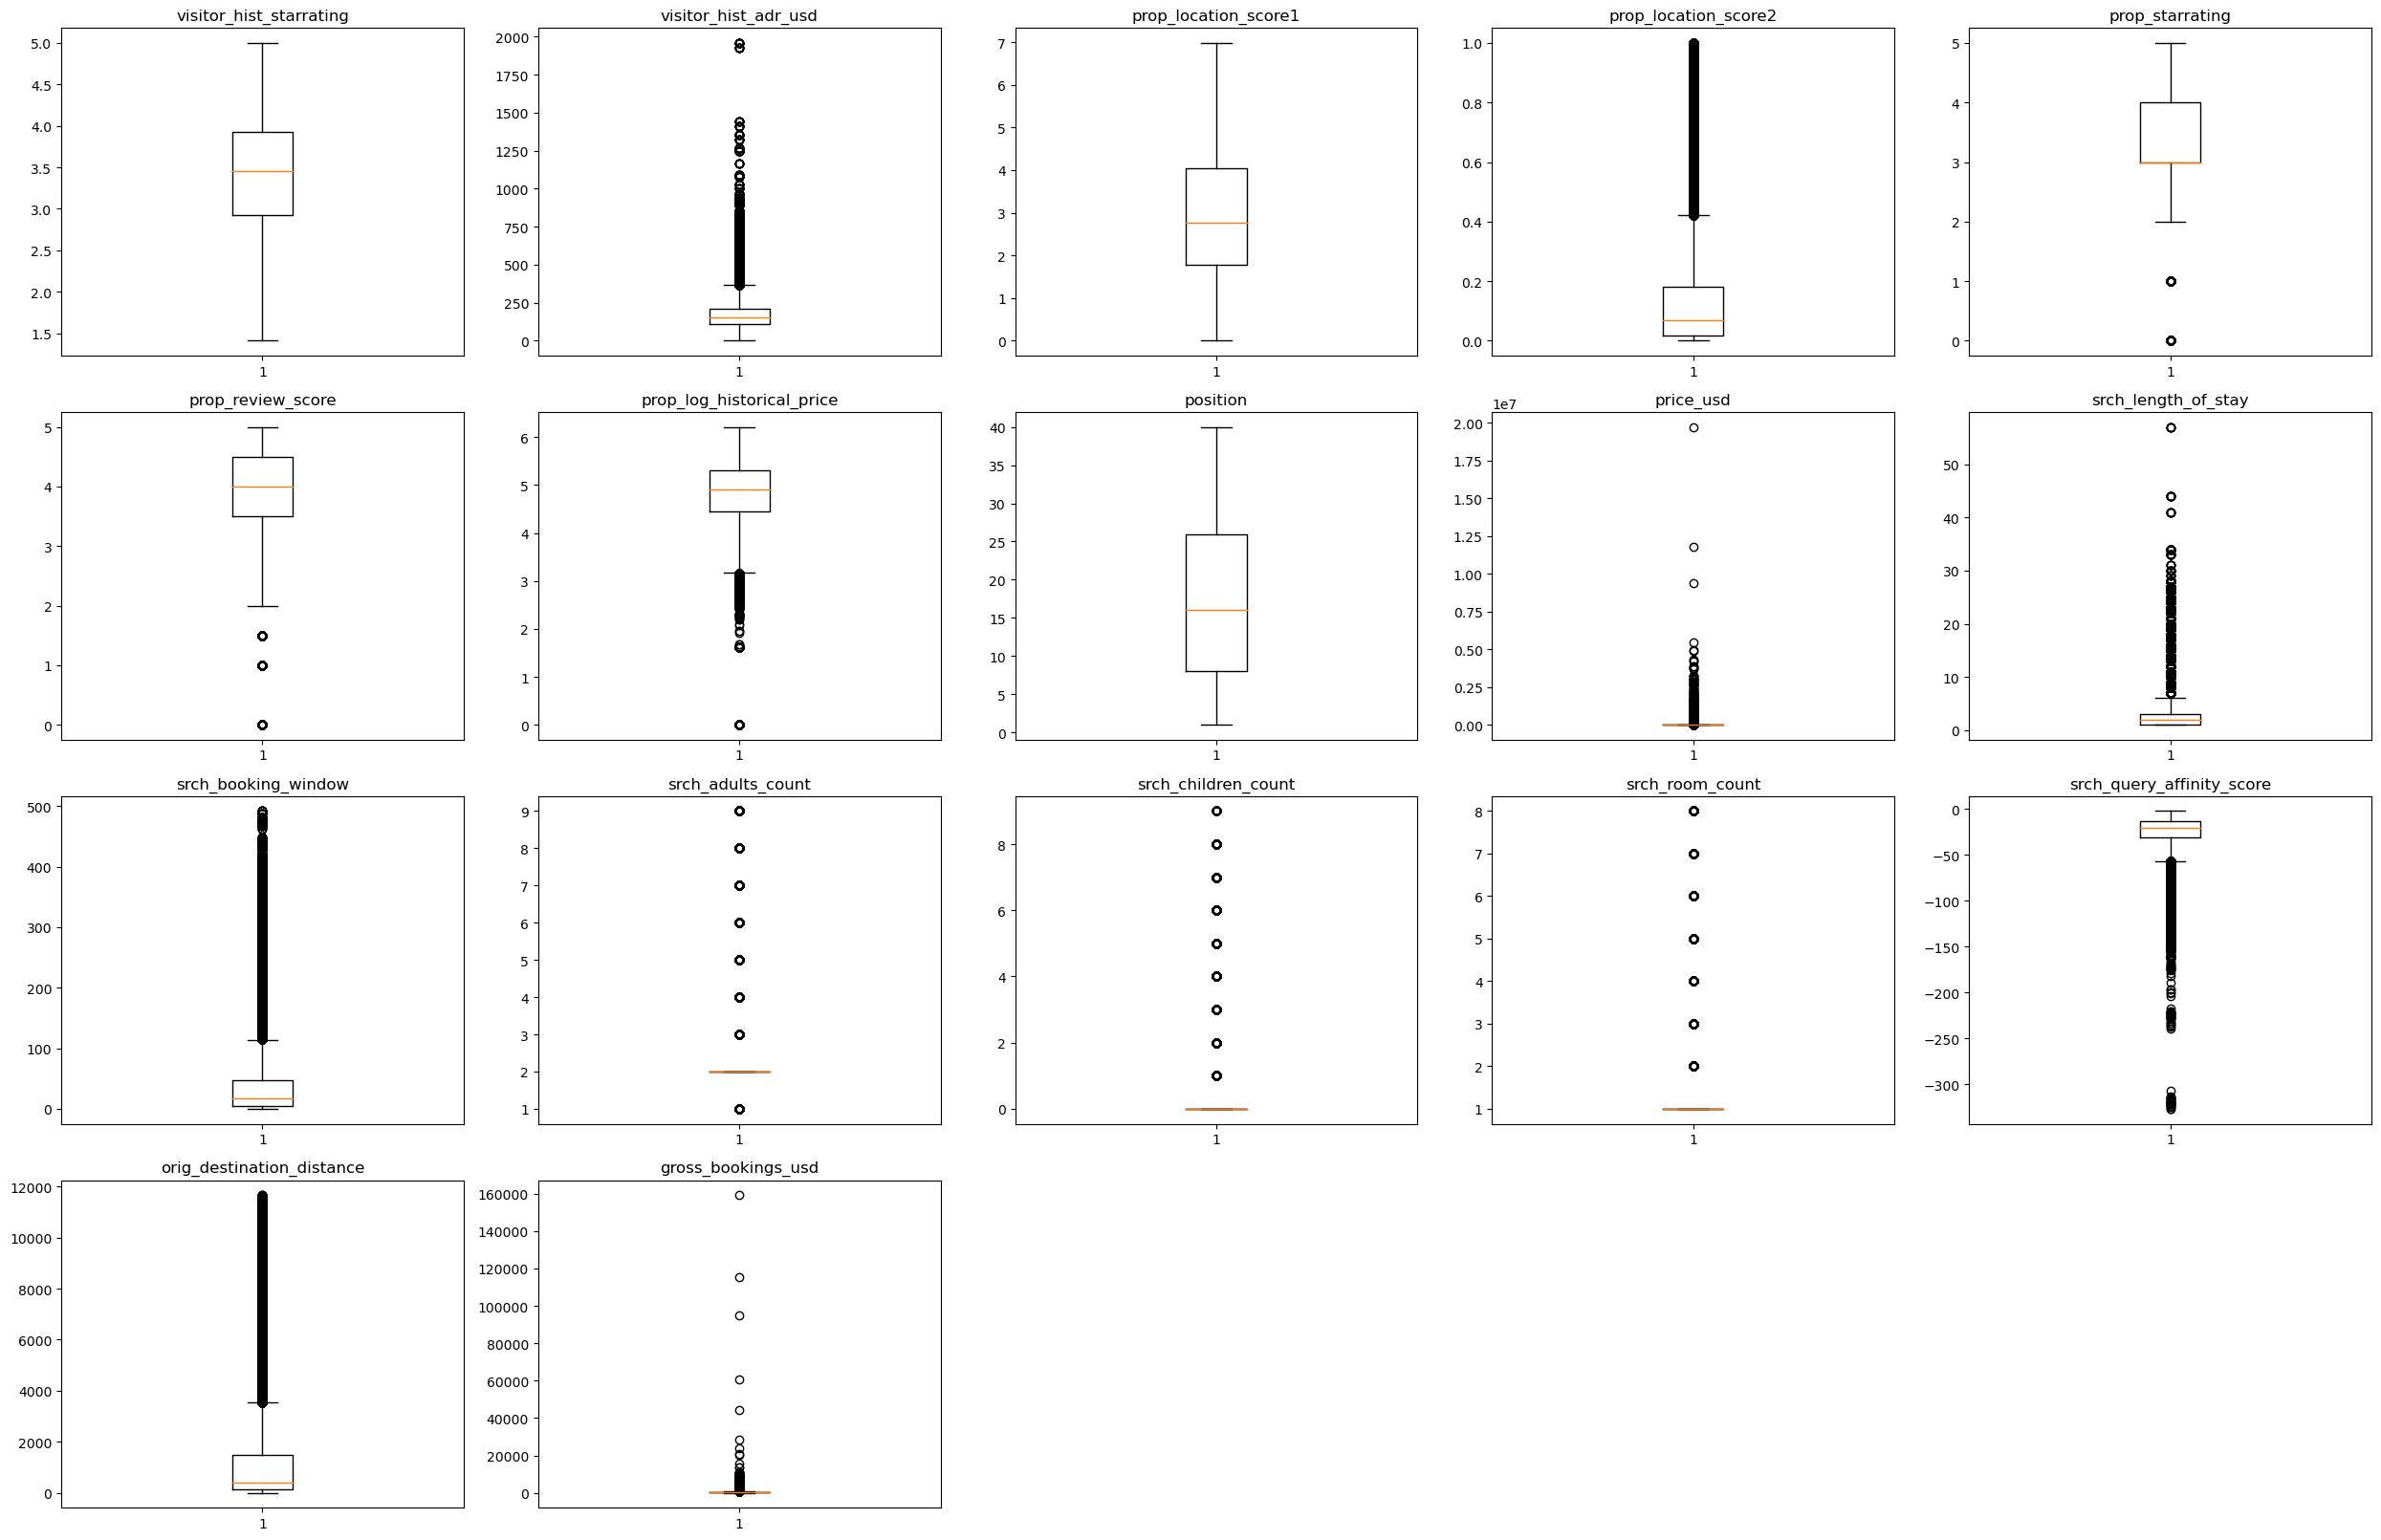

In [16]:
plot_boxplots(df, numerical_nonid_cols, "../image/ass2_box_plot1.png")

Times Expedia had availability when comp1_inv didn´t: 4024.0 , or 3.1%
Times Expedia had availability when comp2_inv didn´t: 83741.0 , or 3.9%
Times Expedia had availability when comp3_inv didn´t: 95376.0 , or 5.8%
Times Expedia had availability when comp4_inv didn´t: 33216.0 , or 9.7%
Times Expedia had availability when comp5_inv didn´t: 121373.0 , or 5.1%
Times Expedia had availability when comp6_inv didn´t: 19823.0 , or 7.6%
Times Expedia had availability when comp7_inv didn´t: 29655.0 , or 8.3%
Times Expedia had availability when comp8_inv didn´t: 19801.0 , or 1.0%
Times Expedia had lower price than comp1_rate: 57541.0 , or 48.0%
Times Expedia had lower price than comp2_rate: 89470.0 , or 4.4%
Times Expedia had lower price than comp3_rate: 26528.0 , or 1.7%
Times Expedia had lower price than comp4_rate: -5085.0 , or -1.7%
Times Expedia had lower price than comp5_rate: 50395.0 , or 2.3%
Times Expedia had lower price than comp6_rate: 30819.0 , or 12.8%
Times Expedia had lower price t

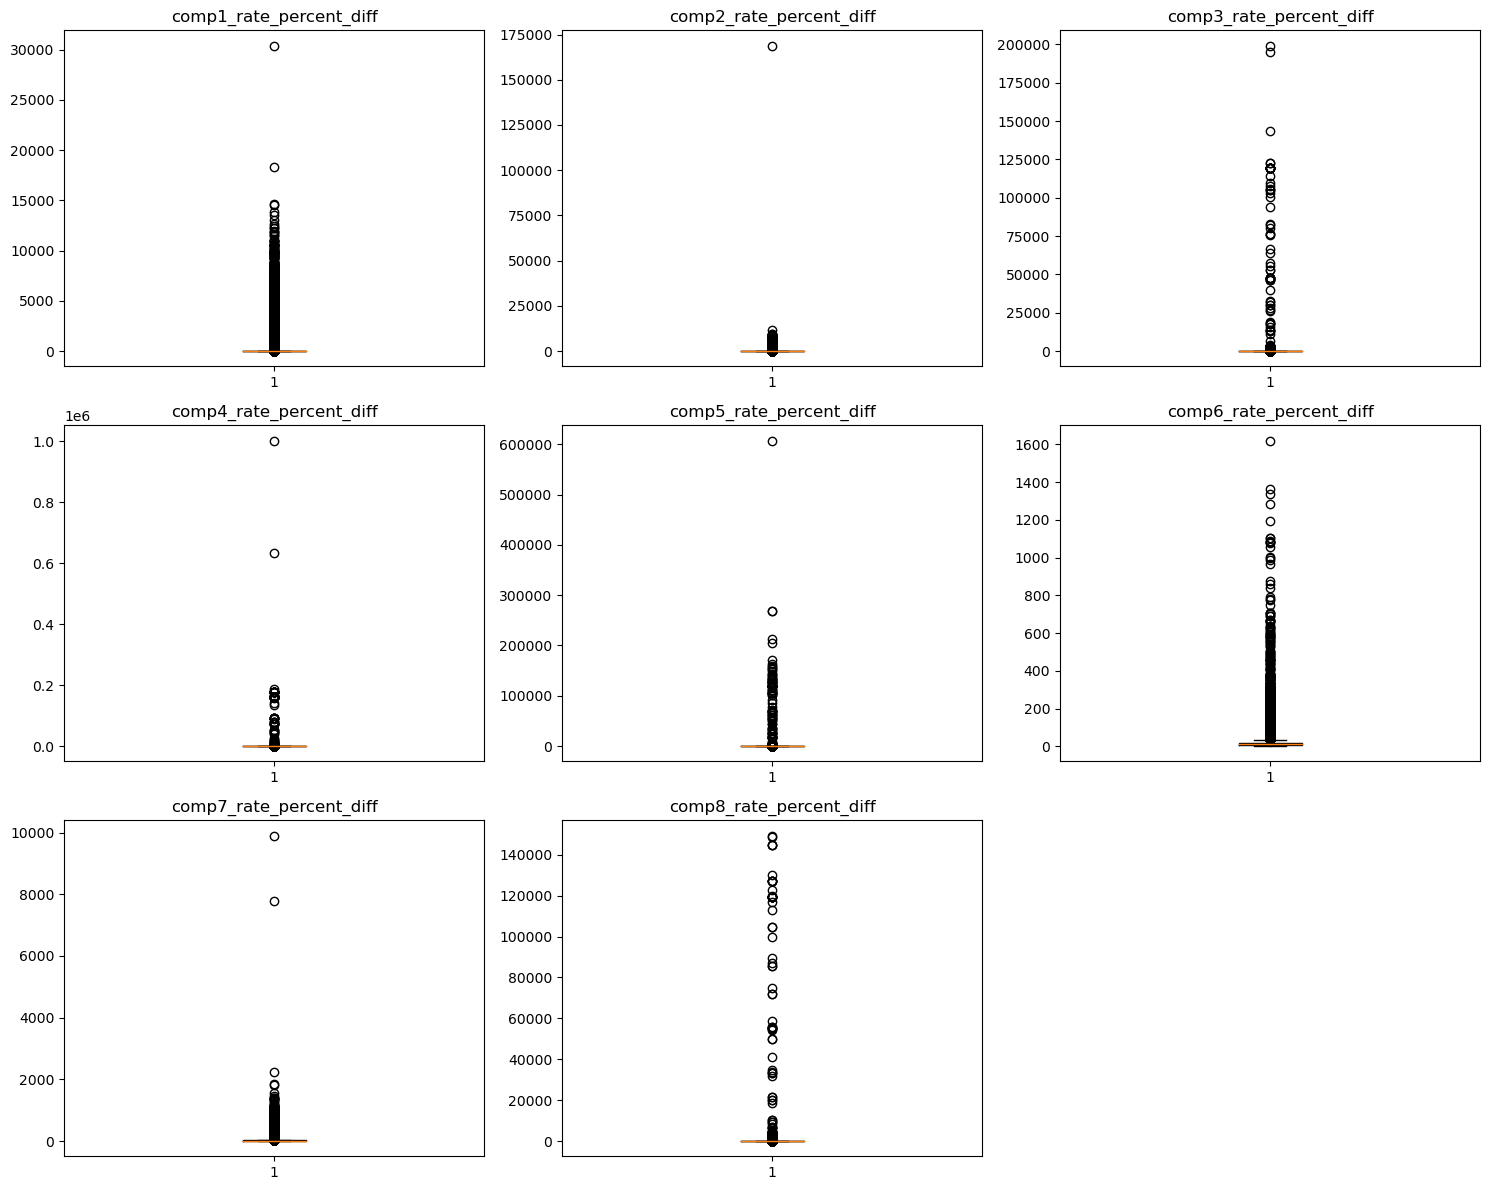

In [27]:
numeric_comp, nonnumeric_comp = split_by_substring(has_comp, 'diff')
bool_comp, comparison_comp = split_by_substring(nonnumeric_comp, 'inv')

for col in bool_comp:
    print("Times Expedia had availability when {} didn´t:".format(col), df[col].sum(), ", or {}%".format(round(df[col].sum() / df[col].notna().sum() * 100, 1)))

for col in comparison_comp:
    print("Times Expedia had lower price than {}:".format(col), df[col].sum(), ", or {}%".format(round(df[col].sum() / df[col].notna().sum() * 100, 1)))
print("Negative means competitor had lower price")

plot_boxplots(df, numeric_comp, "../image/ass2_box_plot2.png")

In [ ]:
corr_mat = df.drop(columns=['date_time']).corr()
print(corr_mat)

                                         srch_id              site_id  \
srch_id                                     1.00                 0.00   
site_id                                     0.00                 1.00   
visitor_location_country_id                -0.01                -0.31   
visitor_hist_starrating                    -0.01                 0.31   
visitor_hist_adr_usd                        0.00                 0.10   
prop_country_id                            -0.01                -0.31   
prop_id                                    -0.00                 0.00   
prop_starrating                            -0.00                 0.17   
prop_review_score                          -0.00                -0.07   
prop_brand_bool                            -0.00                -0.20   
prop_location_score1                        0.00                 0.18   
prop_location_score2                        0.00                 0.06   
prop_log_historical_price                  -0.00   

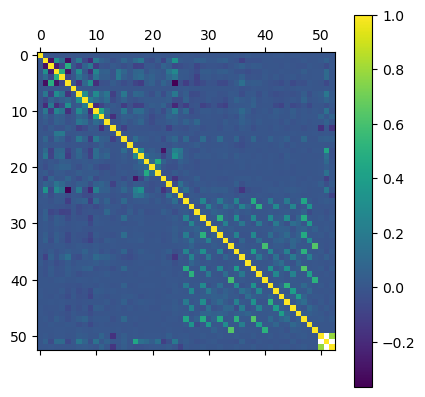

In [47]:
plt.matshow(corr_mat)
plt.colorbar()
plt.show
plt.savefig("../image/ass2_corrmat_big.png")

In [38]:
s = corr_mat.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
print(so[53:93])

booking_bool                 click_bool                                    0.78
click_bool                   booking_bool                                  0.78
comp5_rate                   comp8_rate                                    0.64
comp8_rate                   comp5_rate                                    0.64
comp8_rate_percent_diff      comp3_rate_percent_diff                       0.63
comp3_rate_percent_diff      comp8_rate_percent_diff                       0.63
comp5_rate_percent_diff      comp3_rate_percent_diff                       0.59
comp3_rate_percent_diff      comp5_rate_percent_diff                       0.59
comp5_inv                    comp1_inv                                     0.51
comp1_inv                    comp5_inv                                     0.51
comp8_rate                   comp4_rate                                    0.51
comp4_rate                   comp8_rate                                    0.51
comp2_rate                   comp3_rate 

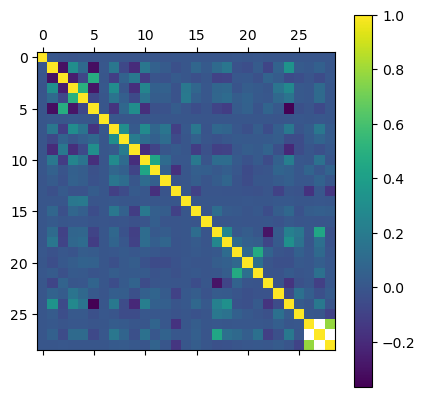

In [48]:
corr_mat_nocomp = df_nocomp.drop(columns=['date_time']).corr()
plt.matshow(corr_mat_nocomp)
plt.colorbar()
plt.show
plt.savefig("../image/ass2_corrmat_small.png")

In [46]:
s_nocomp = corr_mat_nocomp.unstack()
so_nocomp = s_nocomp.sort_values(kind="quicksort", ascending=False)
print(so_nocomp[29:69])

booking_bool                 click_bool                                    0.78
click_bool                   booking_bool                                  0.78
visitor_hist_starrating      visitor_hist_adr_usd                          0.50
visitor_hist_adr_usd         visitor_hist_starrating                       0.50
prop_country_id              visitor_location_country_id                   0.48
visitor_location_country_id  prop_country_id                               0.48
srch_adults_count            srch_room_count                               0.47
srch_room_count              srch_adults_count                             0.47
srch_length_of_stay          gross_bookings_usd                            0.44
gross_bookings_usd           srch_length_of_stay                           0.44
prop_location_score2         prop_location_score1                          0.44
prop_location_score1         prop_location_score2                          0.44
site_id                      orig_destin